## Let's solve a classification problem on kaggle 

**problem :** [StumbleUpon Evergreen Classification Challenge]("https://www.kaggle.com/c/stumbleupon/overview")

## Import Libraries :

In [293]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
import re

## Data Loading : 

In [294]:
data = pd.read_csv('train.tsv',sep='\t')
data.sample(2).T

,823,1773
url,http://list25.com/25-facts-about-dreams-that-w...,http://projectfit.org/iflifeblog/2008/02/25/fa...
urlid,5204,10284
boilerplate,"{""url"":""list25 25 facts about dreams that wont...","{""title"":"" "",""body"":"" "",""url"":""projectfit org ..."
alchemy_category,health,?
alchemy_category_score,0.479363,?
avglinksize,2.043956,3.666667
commonlinkratio_1,0.387097,0.4
commonlinkratio_2,0.193548,0.0
commonlinkratio_3,0.086022,0.0
commonlinkratio_4,0.032258,0.0


## Data Exploration and cleaning :

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

### Column Summary :

In [296]:
def print_column_summay(data):
    n , _ = data.shape
    name = []
    dtype = []
    unique_values_conut = []
    missing_value = []
    for column in data.columns:
        # print(column) 
        name.append(column)
        # print(str(data[column].dtype))
        data_type = str(data[column].dtype)
        dtype.append(str(data[column].dtype))
        if(data_type=="float64"):
            unique_values_conut.append("")
        else:
            unique_values_conut.append(str(data[column].nunique()))  
        missing_value.append(f" {round(data[column].isnull().sum() / n,2)} %")
    
    summary = {
        "Name":name,
        "Type":dtype,
        "Unique Values count":unique_values_conut,
        "Missing Values":missing_value
    }
    summary_table = pd.DataFrame(summary)
    return summary_table

print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


### Duplicated Values :

In [297]:
print("Number of Duplicated Values : ",data.duplicated().sum())

Number of Duplicated Values :  0


## Feature Engineering and EDA

### **URL**

In [298]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].url)

# web site , domaine (.com , .uk , .fr) using regex :

187 http://loneplacebo.com/how-to-download-youtube-videos-via-the-command-line/
230 http://itechfuture.com/computing-future-synapse/
128 http://www.aarpmagazine.org/health/stay_thin.html
157 http://buzzfun.info/trust-me-im-an-engineer/
135 http://news.sky.com/home/world-news/article/16201528
0 http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html
341 http://www.drunkenfairies.com/
40 http://www.second-opinions.co.uk/bottle.html
158 http://www.infobarrel.com/8_Drinks_That_Will_Make_You_Fat
94 http://www.pizzadelivery.org/interesting-stuff/6-interesting-facts-about-pizza-hut-10540/


In [299]:
def get_WebsiteName_Domaine(url,wich="w"):
    pattern_name_webSite = r'(?<=www\.)[^.]+(?=\.)'
    patter_domaine = r'\.[a-z]+(?=\/|$)'
    match_name_webSite = re.search(pattern_name_webSite,url)
    match_domaine = re.search(patter_domaine,url)
    if match_name_webSite and wich=="w":
        return match_name_webSite.group(0)
    elif match_domaine and wich=="d":
        return match_domaine.group(0)
    else:
        "Unknown"

data["Web site"] = data['url'].apply(get_WebsiteName_Domaine)
data["Domaine"] = data['url'].apply(get_WebsiteName_Domaine,wich="d")


In [300]:
data["Domaine"].value_counts()[:10].to_frame().style.background_gradient()

,count
Domaine,
.com,6298
.net,301
.uk,265
.org,244
.ca,45
.au,39
.info,34
.edu,17
.de,16


In [301]:
data["Web site"].value_counts()[:10].to_frame().style.background_gradient()

,count
Web site,
insidershealth,143
huffingtonpost,99
youtube,85
ivillage,59
foodnetwork,57
dailymail,46
epicurious,36
womansday,35
bbc,34


In [302]:
print_column_summay(data)

,Name,Type,Unique Values count,Missing Values
0,url,object,7395,0.0 %
1,urlid,int64,7395,0.0 %
2,boilerplate,object,7394,0.0 %
3,alchemy_category,object,14,0.0 %
4,alchemy_category_score,object,4806,0.0 %
5,avglinksize,float64,,0.0 %
6,commonlinkratio_1,float64,,0.0 %
7,commonlinkratio_2,float64,,0.0 %
8,commonlinkratio_3,float64,,0.0 %
9,commonlinkratio_4,float64,,0.0 %


In [303]:
indexs = np.random.randint(0,375,10)
for i in indexs:
    print(i , data.iloc[i].boilerplate)


181 {"title":"Nets Announcers Ian Eagle And Mike Fratello Fight On Air nets announcers ian eagle and mike fratello fight on air | jockular overly sensitive basketball announcer initiates one of the most awkward moments in television history. overly sensitive basketball announcer initiates one of the most awkward moments in television history.","body":"Overly sensitive basketball announcer initiates one of the most awkward moments in television history posted yesterday Overlooked among all the teams that exist in sports are the broadcasting teams that to fans watching at home can be just as important as the ones competing in front of the cameras and sometimes just as entertaining When forced to spend several hours at a time cramped together into a small booth not to mention that two hour drive from Philly emotions can bubble over on the air and dazzling gems of awkwardness like this one between the YES Network s Ian Eagle and Mike Fratello during Saturday s Celtics Nets game are human n

In [304]:
import json
def extract_title_body_lenght(data):
    boilerplatedf = data["boilerplate"].apply(json.loads)
    boilerplatedf = pd.DataFrame(boilerplatedf.tolist())
    data['boilerplate title'] = boilerplatedf['title']
    data['boilerplate body'] = boilerplatedf['body']
    data['boilerplate title'] = data['boilerplate title'].fillna('')
    data['boilerplate body'] = data['boilerplate body'].fillna('')
    data['boilerplate title lenght'] = data["boilerplate title"].apply(lambda x : len(x))
    data['boilerplate body lenght'] = data["boilerplate body"].apply(lambda x : len(x))
    del boilerplatedf
    return data

In [305]:
data = extract_title_body_lenght(data)
data.sample(2).T

,5353,7066
url,http://www.staplenews.com/home/2012/4/28/dream...,http://www.lovemaegan.com/?m=1
urlid,8919,3603
boilerplate,"{""title"":""Dream Lines Part III Home dream line...","{""title"":""love Maegan Fashion DIY Home Lifesty..."
alchemy_category,science_technology,?
alchemy_category_score,0.181393,?
avglinksize,2.323077,2.058824
commonlinkratio_1,0.605634,0.294118
commonlinkratio_2,0.422535,0.294118
commonlinkratio_3,0.042254,0.294118
commonlinkratio_4,0.042254,0.294118


<Axes: title={'center': 'Average Boilerplate title Length of Evergreen vs Non Evergreen Label'}, ylabel='label'>

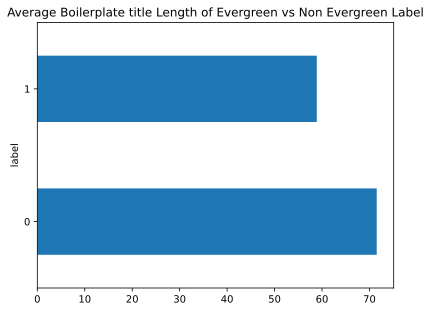

In [306]:
data.groupby("label")["boilerplate title lenght"].mean().plot(kind='barh',title="Average Boilerplate title Length of Evergreen vs Non Evergreen Label")

<Axes: title={'center': 'Average Boilerplate body Length of Evergreen vs Non Evergreen Label'}, ylabel='label'>

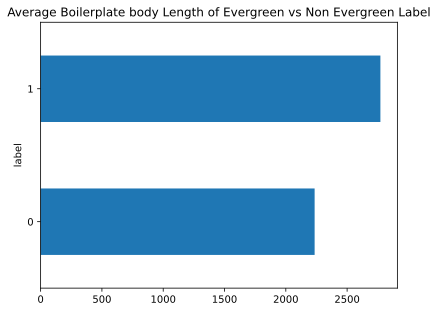

In [307]:
data.groupby("label")["boilerplate body lenght"].mean().plot(kind='barh',title="Average Boilerplate body Length of Evergreen vs Non Evergreen Label")

<Axes: title={'center': 'Count plot Alchemy Category'}, xlabel='alchemy_category'>

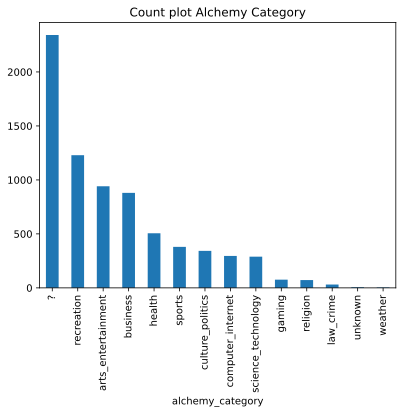

In [308]:
data['alchemy_category'].value_counts().plot(
    kind='bar',
    title="Count plot Alchemy Category",
)

<Axes: ylabel='alchemy_category'>

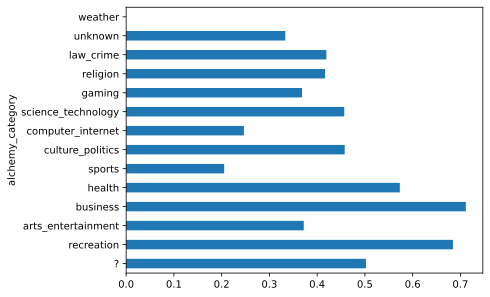

In [309]:
data.groupby('alchemy_category').label.agg(['mean', 'count']).sort_values('count', ascending=False)['mean'].plot.barh()

In [310]:
data['is_news'] = data['is_news'].str.replace('?', '0').astype(int)